In [15]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import sqrt

**Reading the data required**

In [16]:
dailyData = pd.read_csv("../../dataset/dailyData.csv", infer_datetime_format = True, parse_dates = ['DateTime'], index_col = ['DateTime'])
weeklyData = pd.read_csv("../../dataset/weeklyData.csv", infer_datetime_format = True, parse_dates = ['DateTime'], index_col = ['DateTime'])
monthlyData = pd.read_csv("../../dataset/monthlyData.csv", infer_datetime_format = True, parse_dates = ['DateTime'], index_col = ['DateTime'])

**SARIMA model for prediction on Daily basis**

In [17]:
dailyGAP = dailyData['Global_active_power']
dailyGAP_train = dailyGAP['2006-12-31':'2009']
dailyGAP_diff = dailyGAP_train.diff()['2007':]
dailyGAP_diff.head()

DateTime
2007-01-01    -745.192
2007-01-02   -1479.768
2007-01-03    -255.182
2007-01-04    2245.358
2007-01-05    -546.048
Name: Global_active_power, dtype: float64

**Performing the Augmented Dickey fuller test**

In [18]:
#Performing Augmented Dickey fuller test
X = dailyGAP_diff.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The series is stationary the result is statistically significant

ADF Statistic: -10.371971
p-value: 0.000000


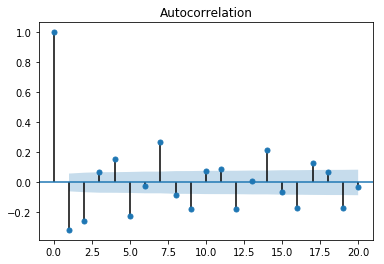

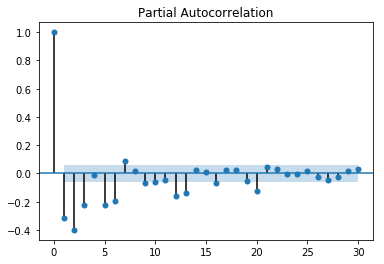

In [19]:
dailyACF = plot_acf(dailyGAP_diff, lags = 20)
dailyPACF = plot_pacf(dailyGAP_diff, lags = 30)


In [78]:
# Predicting on a daily basis
# Trying to find the best parameters

p = range(3,8)
q = range(2,4)
season_duration = 7
sp = range(1,3)
sd = range(1)
seasonalps = [(x[0], x[1], 0, season_duration) for x in list(itertools.product(sp,sd))]
param = [(x[0], 1, x[1]) for x in list(itertools.product(p,q))]

for pdq in param:
    for param_seasonal in seasonalps:
        mod = sm.tsa.statespace.SARIMAX(dailyGAP_train,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

        results = mod.fit()
        rmse = sqrt(mean_squared_error(results.fittedvalues, dailyGAP_train))
        print('ARIMA{}x{} - AIC:{} -RMSE:{}'.format(pdq, param_seasonal, results.aic, rmse))

ARIMA(3, 1, 2)x(1, 0, 0, 7) - AIC:16303.973498659965 -RMSE:463.78232171087166
ARIMA(3, 1, 2)x(2, 0, 0, 7) - AIC:16168.782824690396 -RMSE:469.19780927702215
ARIMA(3, 1, 3)x(1, 0, 0, 7) - AIC:16199.15704334718 -RMSE:433.53514647291655
ARIMA(3, 1, 3)x(2, 0, 0, 7) - AIC:16089.627750247717 -RMSE:435.1359707659744


/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(1, 0, 0, 7) - AIC:25439.385791805293 -RMSE:29598.944229874378


/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 2)x(2, 0, 0, 7) - AIC:27102.801045862514 -RMSE:69350.24194909149
ARIMA(4, 1, 3)x(1, 0, 0, 7) - AIC:16184.12559282899 -RMSE:433.48672980793907
ARIMA(4, 1, 3)x(2, 0, 0, 7) - AIC:16073.626436493734 -RMSE:435.12700463163355
ARIMA(5, 1, 2)x(1, 0, 0, 7) - AIC:16254.018014981888 -RMSE:461.02343070784684
ARIMA(5, 1, 2)x(2, 0, 0, 7) - AIC:16101.611240929495 -RMSE:451.21411326536594
ARIMA(5, 1, 3)x(1, 0, 0, 7) - AIC:16166.850725351254 -RMSE:432.76950019025435
ARIMA(5, 1, 3)x(2, 0, 0, 7) - AIC:16060.074547635091 -RMSE:435.6234947070458
ARIMA(6, 1, 2)x(1, 0, 0, 7) - AIC:16213.029277581805 -RMSE:453.0711262987152
ARIMA(6, 1, 2)x(2, 0, 0, 7) - AIC:16080.782845723734 -RMSE:451.85663229953246


/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3)x(1, 0, 0, 7) - AIC:16141.53244993764 -RMSE:431.56807402655437


/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(6, 1, 3)x(2, 0, 0, 7) - AIC:16039.481297664113 -RMSE:433.7388817977196
ARIMA(7, 1, 2)x(1, 0, 0, 7) - AIC:16194.74167613019 -RMSE:450.26987003348216
ARIMA(7, 1, 2)x(2, 0, 0, 7) - AIC:16064.677122204677 -RMSE:452.02511294980644


/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 3)x(1, 0, 0, 7) - AIC:16130.040255461707 -RMSE:432.1441680058961


/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(7, 1, 3)x(2, 0, 0, 7) - AIC:16027.259726211423 -RMSE:434.0419395780698


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1049      0.397     -0.264      0.792      -0.883       0.673
ar.L2         -0.7726      0.509     -1.518      0.129      -1.770       0.225
ar.L3          0.3577      0.465      0.770      0.441      -0.553       1.268
ar.L4          0.0602      0.431      0.140      0.889      -0.784       0.905
ma.L1         -0.4791   1.18e+04  -4.06e-05      1.000   -2.31e+04    2.31e+04
ma.L2          0.5479   7494.020   7.31e-05      1.000   -1.47e+04    1.47e+04
ma.L3         -0.8634   1.05e+04  -8.25e-05      1.000   -2.05e+04    2.05e+04
ar.S.L7        0.0851      0.441      0.193      0.847      -0.780       0.950
ar.S.L14       0.0413      0.406      0.102      0.919      -0.755       0.837
sigma2      1.902e+05      0.238   7.97e+05      0.000     1.9e+05     1.9e+05
ARIMA[4, 1, 3]x[2, 0, 0, 7] - AIC:16073.626436493734

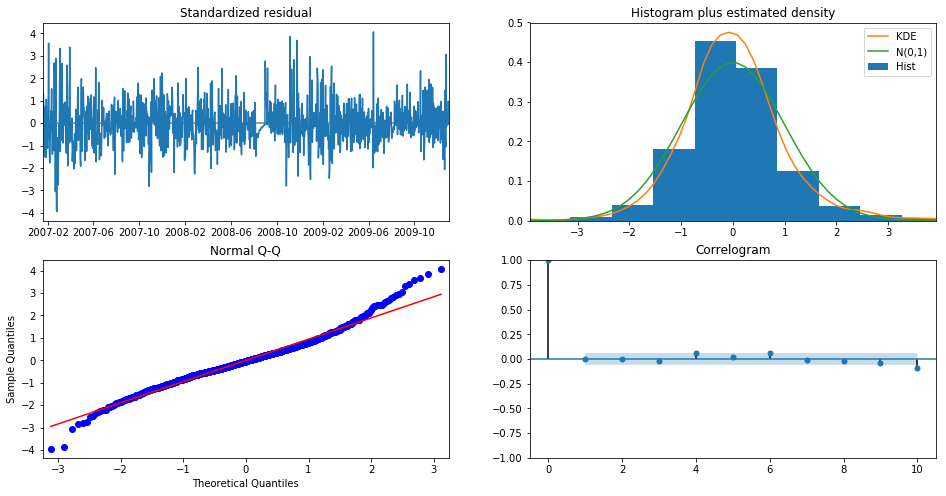

In [75]:
param_seasonal = [2,0,0,7]
pdq = [4,1,3]

mod = sm.tsa.statespace.SARIMAX(dailyGAP_train,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])
rmse = sqrt(mean_squared_error(results.fittedvalues, dailyGAP_train))
print('ARIMA{}x{} - AIC:{} -RMSE:{}'.format(pdq, param_seasonal, results.aic, rmse))
results.plot_diagnostics(figsize=(16,8))
plt.show()

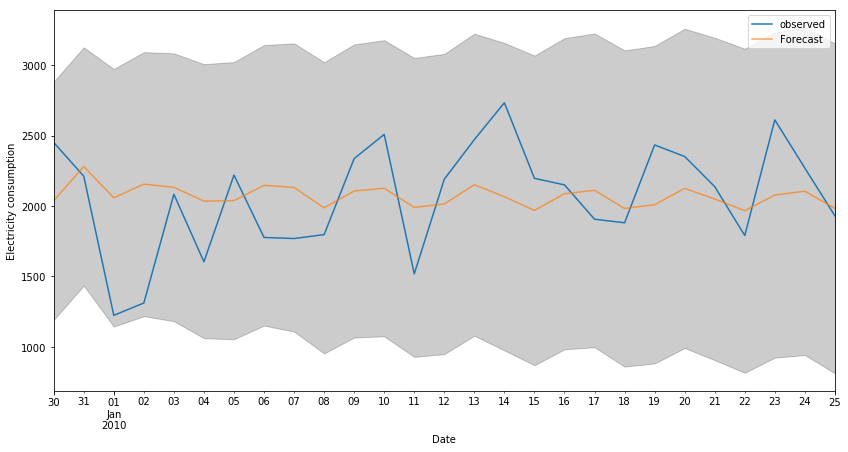

RMSE:375.1572092039636


In [79]:
start_date = '2009-12-30'
end_date = '2010-01-25'

pred = results.get_prediction(start = start_date, end = end_date, dynamic=1)
pred_ci = pred.conf_int()

ax = dailyGAP[start_date:end_date].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity consumption')
plt.legend()

plt.show()

rmse = sqrt(mean_squared_error(pred.predicted_mean, dailyGAP[start_date:end_date].values))
print('RMSE:{}'.format(rmse))

**SARIMA model for prediction on weekly basis**

In [4]:
weeklyGAP = weeklyData['Global_active_power']
weeklyGAP_train = weeklyGAP[:'2009']
weeklyGAP_diff = weeklyGAP_train.diff()[1:]
weeklyGAP_train.tail()

DateTime
2009-11-29    12069.672
2009-12-06    13768.268
2009-12-13    13350.698
2009-12-20    11940.240
2009-12-27    14790.800
Name: Global_active_power, dtype: float64

In [5]:
#Performing Augmented Dickey fuller test
X = weeklyGAP_train.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The series is stationary the result is statistically significant

ADF Statistic: -3.686369
p-value: 0.004309


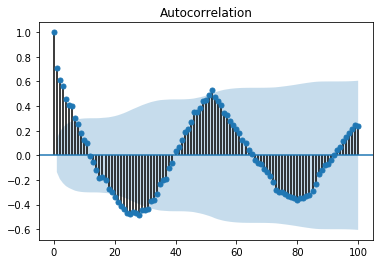

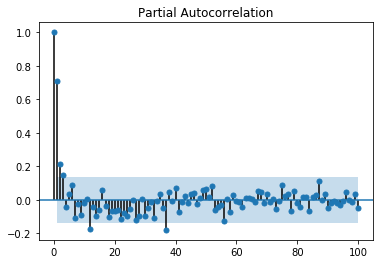

In [20]:
weeklyACF = plot_acf(weeklyGAP, lags = 100)
weeklyPACF = plot_pacf(weeklyGAP, lags = 100)


In [7]:
# Predicting on a weekly basis
# Trying to find the best parameters

p = range(3)
q = range(0,2)
season_duration = 52    # As attatined from the analysis
sp = range(1,2)
sq = range(2)
seasonalps = [(x[0], 0, x[1], season_duration) for x in list(itertools.product(sp,sq))]
param = [(x[0], 0, x[1]) for x in list(itertools.product(p,q))]

for pdq in param:
    for param_seasonal in seasonalps:
        mod = sm.tsa.statespace.SARIMAX(weeklyGAP_train,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
        results = mod.fit()
        rmse = sqrt(mean_squared_error(results.fittedvalues, weeklyGAP_train))
        print('ARIMA{}x{} - AIC:{} -RMSE:{}'.format(pdq, param_seasonal, results.aic, rmse))

ARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:1987.0834911905563 -RMSE:7003.319267743751
ARIMA(0, 0, 0)x(1, 0, 1, 52) - AIC:1954.4696457636906 -RMSE:7002.000574484771
ARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:1972.238560987659 -RMSE:5713.124171258206
ARIMA(0, 0, 1)x(1, 0, 1, 52) - AIC:1926.1149825112789 -RMSE:5853.716079188338
ARIMA(1, 0, 0)x(1, 0, 0, 52) - AIC:1911.5468658858906 -RMSE:2502.37238880643
ARIMA(1, 0, 0)x(1, 0, 1, 52) - AIC:1913.3004554221618 -RMSE:2502.355835210871
ARIMA(1, 0, 1)x(1, 0, 0, 52) - AIC:1905.924793572199 -RMSE:2393.5632696626544
ARIMA(1, 0, 1)x(1, 0, 1, 52) - AIC:1888.805761910728 -RMSE:2398.848154225872
ARIMA(2, 0, 0)x(1, 0, 0, 52) - AIC:1890.6531940303669 -RMSE:2478.751141506694
ARIMA(2, 0, 0)x(1, 0, 1, 52) - AIC:1892.6345646474244 -RMSE:2478.634788988831
ARIMA(2, 0, 1)x(1, 0, 0, 52) - AIC:1888.7282156328295 -RMSE:2377.935992300441
ARIMA(2, 0, 1)x(1, 0, 1, 52) - AIC:1890.7279739013943 -RMSE:2378.1105231503566


**Model Diagnostics**

/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/home/srikumar/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/mlemodel.py:1964: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0914      0.009    115.558      0.000       1.073       1.110
ar.L2         -0.1015      0.009    -10.763      0.000      -0.120      -0.083
ma.L1         -0.4990          0       -inf      0.000      -0.499      -0.499
ar.S.L52       0.3100      0.002    138.641      0.000       0.306       0.314
sigma2      4.661e+06   1.75e-10   2.67e+16      0.000    4.66e+06    4.66e+06
ARIMA[2, 0, 1]x[1, 0, 0, 52] - AIC:1888.7282156328295 -RMSE:2377.935992300441


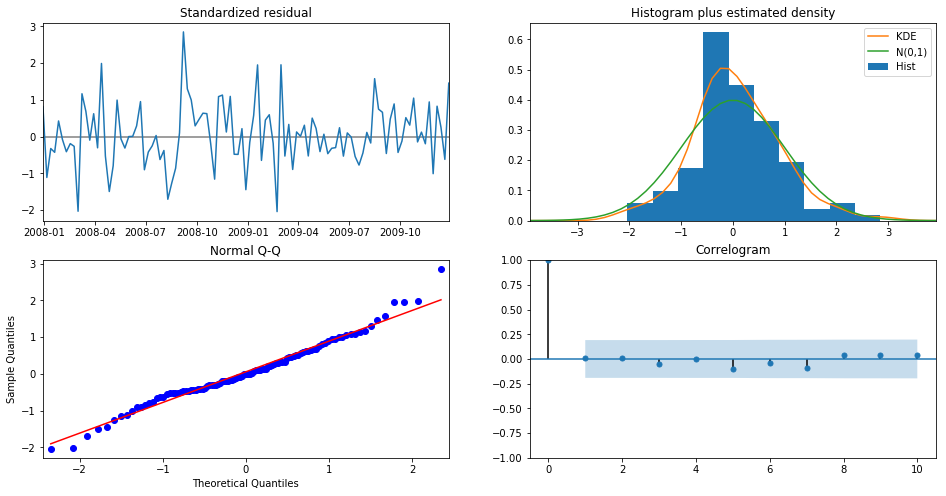

In [8]:
param_seasonal = [1,0,0,52]
pdq = [2,0,1]

mod = sm.tsa.statespace.SARIMAX(weeklyGAP_train,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])
rmse = sqrt(mean_squared_error(results.fittedvalues, weeklyGAP_train))
print('ARIMA{}x{} - AIC:{} -RMSE:{}'.format(pdq, param_seasonal, results.aic, rmse))
results.plot_diagnostics(figsize=(16,8))
plt.show()

**Forecast using the current model**

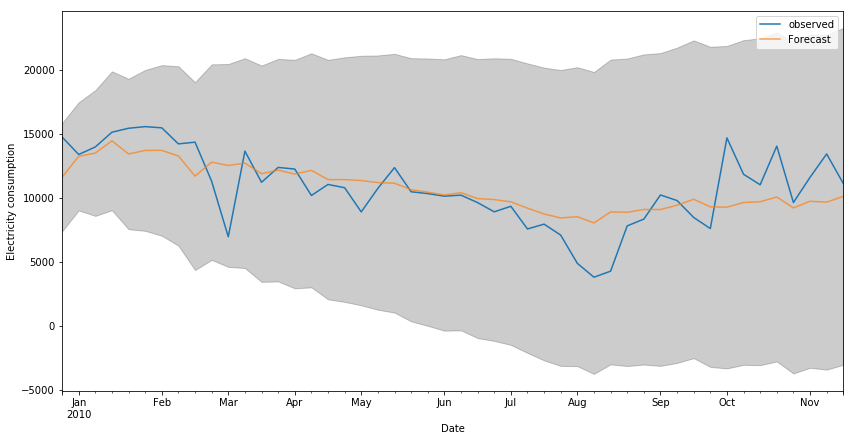

RMSE:2112.522501596455


In [9]:
start_date = '2009-12-27'
end_date = '2010-11-21'

pred = results.get_prediction(start = start_date, end = end_date, dynamic=1)
pred_ci = pred.conf_int()

ax = weeklyGAP[start_date:end_date].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity consumption')
plt.legend()

plt.show()

rmse = sqrt(mean_squared_error(pred.predicted_mean, weeklyGAP[start_date:end_date].values))
print('RMSE:{}'.format(rmse))

**SARIMA model for prediction on Monthly basis**

In [112]:
monthlyGAP = monthlyData['Global_active_power']
monthlyGAP_train = monthlyGAP[:'2009']
monthlyGAP.head()

DateTime
2006-12-31    41826.806
2007-01-31    69017.230
2007-02-28    56496.828
2007-03-31    58862.574
2007-04-30    36529.322
Name: Global_active_power, dtype: float64

In [48]:
#Performing Augmented Dickey fuller test
X = monthlyGAP.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The series is stationary the result is statistically significant

ADF Statistic: -5.290767
p-value: 0.000006


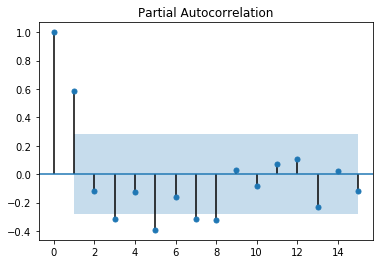

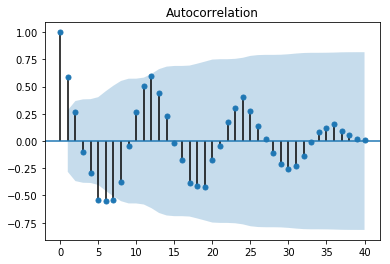

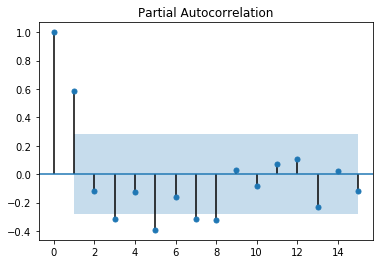

In [121]:
monthlyACF = plot_acf(monthlyGAP, lags = 40)
monthlyPACF = plot_pacf(monthlyGAP, lags = 15)


In [127]:
# Predicting on a monthly basis
# Trying to find the best parameters

season_duration = 12
p = q = range(3)
param_seasonal = [1,0,0,season_duration]
param = [(x[0], 0, x[1]) for x in list(itertools.product(p,q))]


newMonthGAP = monthlyGAP_train['2007':]

for pdq in param:
    mod = sm.tsa.statespace.SARIMAX(newMonthGAP,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()

    #print(results.summary().tables[1])
    rmse = sqrt(mean_squared_error(results.fittedvalues, newMonthGAP))
    print('ARIMA{}x{} - AIC:{} -RMSE:{}'.format(pdq, param_seasonal, results.aic, rmse))

ARIMA(0, 0, 0)x[1, 0, 0, 12] - AIC:501.2347967912455 -RMSE:29815.129834637635
ARIMA(0, 0, 1)x[1, 0, 0, 12] - AIC:567.5989046243928 -RMSE:31093.811783151756
ARIMA(0, 0, 2)x[1, 0, 0, 12] - AIC:569.9990039407201 -RMSE:31391.17867350156
ARIMA(1, 0, 0)x[1, 0, 0, 12] - AIC:486.98163961063824 -RMSE:33308.470472126835
ARIMA(1, 0, 1)x[1, 0, 0, 12] - AIC:487.5931429025227 -RMSE:36080.26995893853
ARIMA(1, 0, 2)x[1, 0, 0, 12] - AIC:489.26281276638116 -RMSE:36005.273263995856
ARIMA(2, 0, 0)x[1, 0, 0, 12] - AIC:472.19583246455124 -RMSE:16634.53192005325
ARIMA(2, 0, 1)x[1, 0, 0, 12] - AIC:483.25545940013046 -RMSE:55987.38441043825
ARIMA(2, 0, 2)x[1, 0, 0, 12] - AIC:468.12058006006765 -RMSE:44773.391521279


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5895      0.001    919.656      0.000       0.588       0.591
ar.L2          0.3684      0.000    943.532      0.000       0.368       0.369
ar.S.L12       0.5433      0.001    571.413      0.000       0.541       0.545
sigma2       1.14e+08   2.31e-12   4.94e+19      0.000    1.14e+08    1.14e+08


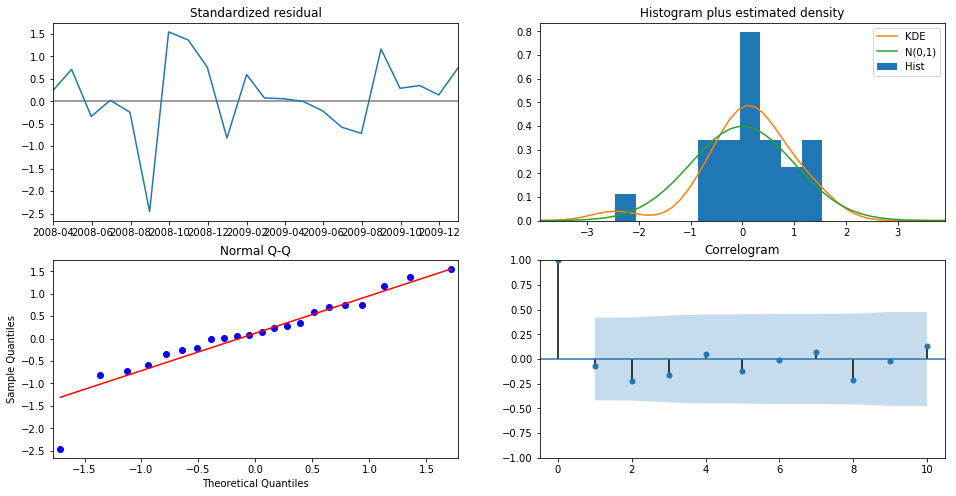

In [129]:
pdq = [2,0,0]
season_duration = 12
param_seasonal = [1,0,0,season_duration]

mod = sm.tsa.statespace.SARIMAX(newMonthGAP,
                                order = pdq,
                                seasonal_order= param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16,8))
plt.show()

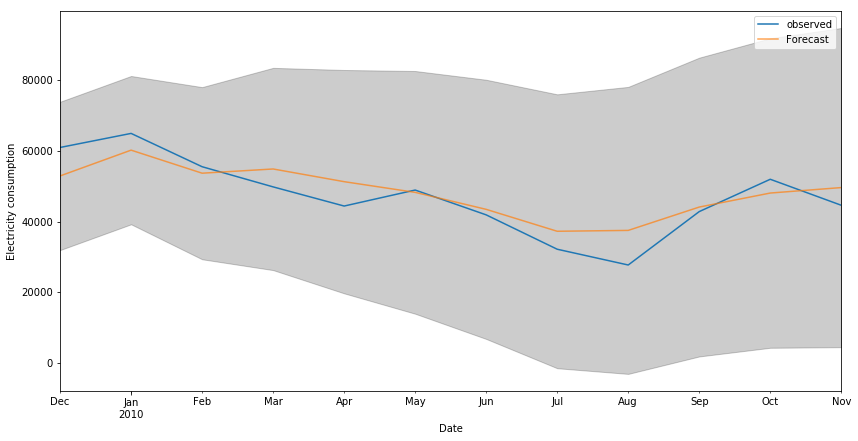

RMSE:5233.018474182762


In [120]:
start_date = '2009-12-31'
end_date = '2010-11-30'

pred = results.get_prediction(start = start_date, end = end_date, dynamic=1)
pred_ci = pred.conf_int()

ax = monthlyGAP[start_date:end_date].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity consumption')
plt.legend()

plt.show()

rmse = sqrt(mean_squared_error(pred.predicted_mean, monthlyGAP[start_date:end_date].values))
print('RMSE:{}'.format(rmse))

DateTime
2010-07-31    32190.406
2010-08-31    27739.654
2010-09-30    42812.682
2010-10-31    51935.398
2010-11-30    44598.388
Name: Global_active_power, dtype: float64